In [1]:
#Importando as bibliotecas:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
#Importando arquivos:
dados = np.loadtxt('Sinal4.txt')
t = np.loadtxt('Tempo4.txt')

#Cropando o sinal após o transitório:
dados = dados[int(len(dados)/5):]
t = t[int(len(t)/5):]

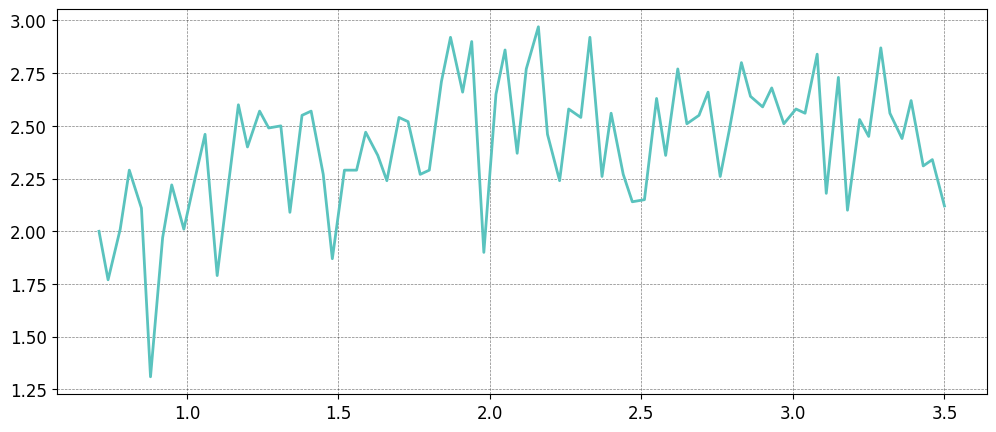

In [3]:
#Sinal com ruído em reginme permanente:
plt.figure(1)
plt.plot(t, dados, color='C2')
plt.show()

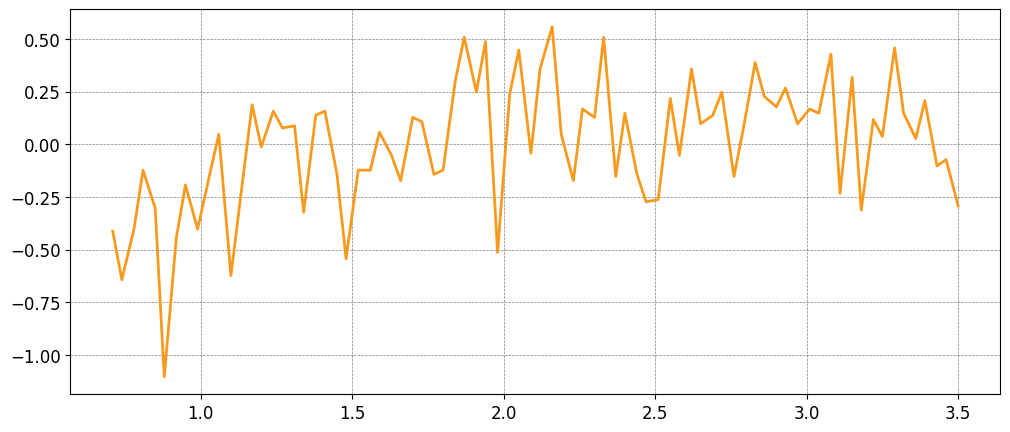

In [4]:
media = np.mean(dados)
sig_noise = (dados-media)

#Sinal excluindo a média:
plt.figure(2)
plt.plot(t, sig_noise, color='C4')
plt.show()

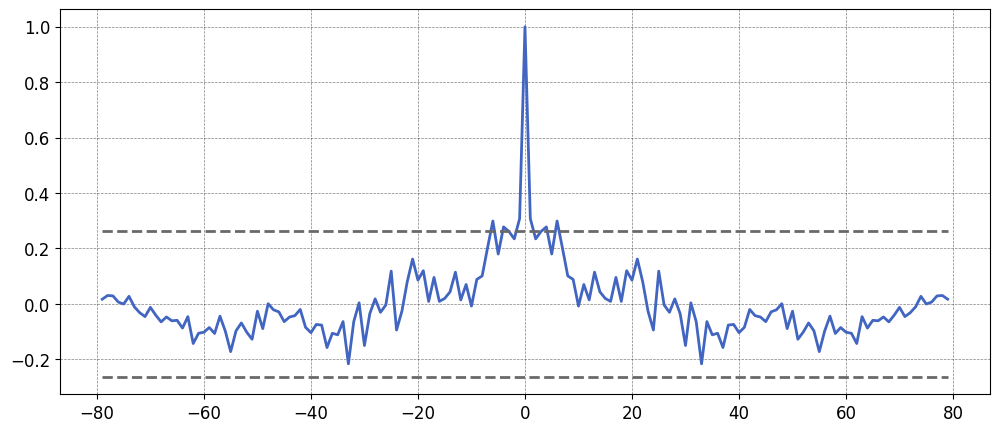

In [5]:
autcorr = signal.correlate(sig_noise, sig_noise)
autcorr /= np.max(autcorr)
sr = np.std(autcorr)
lags = signal.correlation_lags(sig_noise.size, sig_noise.size, mode="full")

#Resultado da correlação:
plt.figure(3)
plt.plot(lags, autcorr, color='C0')
plt.plot(lags,(-1.96*sr)*np.ones(len(lags)), linestyle='dashed', color='C3')
plt.plot(lags,(+1.96*sr)*np.ones(len(lags)), linestyle='dashed', color='C3')
plt.show()